# Retail-Analytics-Project-Profitability-Optimization-Customer-Insights: Business-Case-Study

## 🧩 Problem Statement

A leading retail company has raised concerns about **a sharp decline in profitability during the last quarter of 2017**, despite marketing reports showing a surge in order volume. Management suspects that aggressive discounting campaigns may have played a role, but the full impact on margins, customer behavior, and overall sales performance remains unclear.

At the same time, customer retention has become increasingly challenging, with anecdotal evidence suggesting that high-value customers may be churning at a faster rate. Leadership is seeking a data-driven approach to:

* **Diagnose the root causes** behind the Q4 profitability dip.
* **Understand the effectiveness** of current discounting and sales strategies.
* **Identify high- and low-value customers** to enable more targeted marketing efforts.
* **Predict future revenue potential** from customers to inform investment in retention.
* **Quantify churn risk** and recommend interventions to reduce it.
This business case requires a full-cycle analytical solution, combining exploratory data analysis, predictive modeling, and customer segmentation to uncover insights that can shape strategic decisions across marketing, operations, and finance.

### Core Business Questions

1. **Why did profitability decline so significantly in Q4 2017 despite a spike in order volume?**
2. **Which discounting and pricing strategies may have led to margin erosion?**
3. **What customer behaviors or market dynamics contributed to this pattern?**
4. **How can the business predict future order profitability and reduce discount waste?**
5. **Which customers should be prioritized for retention and upselling based on their long-term value?**
6. **What is the expected churn behavior of different customer segments, and how can it be mitigated?**

### Business Objectives

* **Diagnose the root cause** behind the Q4 2017 profit drop using data-driven exploration and statistical analysis.
* **Develop predictive models** to forecast order-level profitability and customer lifetime value (CLTV).
* **Segment customers** meaningfully to enable personalized marketing, retention campaigns, and pricing strategies.
* **Quantify churn risk** and estimate the average duration of activity for different customer groups.
* **Deliver actionable KPIs and business recommendations** to guide decision-making in pricing, customer engagement, and channel strategy.

### Data Landscape

* \~180,000 transactional records including order details, discount rates, customer IDs, shipping times, geolocation, and profit.
* Quarterly trends from 2014 to 2017, offering rich time-series insights into sales, discounting, and customer behavior.

# DATA PREPERATION

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [383]:
# Load dataset
df_og = pd.read_csv(r"C:\Users\jaiba\Desktop\Data-Driven Profitability & Customer Lifetime Value Prediction in Retail\e-commerce transactional dataset.csv",encoding='latin1')  
df_og.head().T

,0,1,2,3,4
Type,DEBIT,TRANSFER,CASH,DEBIT,PAYMENT
Days for shipping (real),3,5,4,3,2
Days for shipment (scheduled),4,4,4,4,4
Benefit per order,91.25,-249.089996,-247.779999,22.860001,134.210007
Sales per customer,314.640015,311.359985,309.720001,304.809998,298.25
Delivery Status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping
Late_delivery_risk,0,1,0,0,0
Category Id,73,73,73,73,73
Category Name,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods
Customer City,Caguas,Caguas,San Jose,Los Angeles,Caguas


In [384]:
rows_count, cols_count = df_og.shape

print(f"Number of rows: {rows_count}")
print(f"Number of columns: {cols_count}")

Number of rows: 180519
Number of columns: 53


In [385]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [386]:
df_og.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [387]:
df_og.isnull().sum().sort_values(ascending=False)

Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0


In [388]:
# Remove leading/trailing spaces from all column names
df_og.columns = df_og.columns.str.strip()

In [389]:
df_og.drop(columns=[
    'Customer Lname',
    'Product Description',
    'Customer Zipcode',
    'Order Zipcode',
    'Customer Password',
    'Customer Email'
], inplace=True)

In [390]:
df_og.isnull().sum().sort_values(ascending=False)

Type                             0
Order Profit Per Order           0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Region                     0
order date (DateOrders)          0
Order State                      0
Order Status                     0
Product Card Id                  0
Product Category Id              0
Product Image                    0
Product Name                     0
Product Price                    0
Product Status                   0
shipping date (DateOrders)       0
Order Id                         0
Order Customer Id                0
Days for shipping (real)         0
Customer Fname                   0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer  

In [391]:
# Convert date columns
df_og['order date (DateOrders)'] = pd.to_datetime(df_og['order date (DateOrders)'], errors='coerce')
df_og['shipping date (DateOrders)'] = pd.to_datetime(df_og['shipping date (DateOrders)'], errors='coerce')

# Create new feature: shipping delay in days
df_og['shipping Delay (Days)'] = (df_og['shipping date (DateOrders)'] - df_og['order date (DateOrders)']).dt.days


**Purpose:**
- Convert string-based date columns into datetime objects using `pd.to_datetime()`.
- Calculate shipping delay in days by subtracting the order date from the shipping date.

**Key Details:**
- `errors='coerce'` converts invalid dates to `NaT` (Not a Time) to avoid crashes.
- `.dt.days` extracts the delay as an integer value in days.

**Why It Matters:**
Shipping delay is crucial for:
1. Profitability prediction  
2. Late delivery risk modeling  
3. Logistics optimization  

--- 

Super clean, practical, and a solid building block for deeper data analysis.

## Outlier detection & Removal

In [392]:
print(df_og.columns.tolist())

['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Product Card Id', 'Product Category Id', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (DateOrders)', 'Shipping Mode', 'shipping Delay (Days)']


In [393]:
num_cols = [
    'Benefit per order',
    'Category Id', 'Customer Id',
    'Department Id', 'Order Item Cardprod Id',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
    'Order Item Profit Ratio', 'Order Item Quantity',
    'Sales', 'Order Item Total',
    'Product Category Id', 'Product Price'
]


In [394]:
df_og[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Department Id,180519.0,5.443460,1.629246,2.00000,4.000000,5.000000,7.000000,12.000000
Order Item Cardprod Id,180519.0,692.509764,336.446807,19.00000,403.000000,627.000000,1004.000000,1363.000000
Order Item Discount,180519.0,20.664741,21.800901,0.00000,5.400000,14.000000,29.990000,500.000000
Order Item Discount Rate,180519.0,0.101668,0.070415,0.00000,0.040000,0.100000,0.160000,0.250000
Order Item Id,180519.0,90260.000000,52111.490959,1.00000,45130.500000,90260.000000,135389.500000,180519.000000
Order Item Profit Ratio,180519.0,0.120647,0.466796,-2.75000,0.080000,0.270000,0.360000,0.500000
Order Item Quantity,180519.0,2.127638,1.453451,1.00000,1.000000,1.000000,3.000000,5.000000


| Column                    | Action                    | Suggested Boundaries       |
| ------------------------- | ------------------------- | -------------------------- |
| `Benefit per order`       | Remove or cap             | Lower < -80, Upper > 151.5 |
| `Order Item Discount`     | Remove or cap             | Upper > 67.88              |
| `Order Item Profit Ratio` | Remove or cap (negatives) | Lower < -0.34              |
| `Sales`                   | Remove or cap             | Upper > 570                |
| `Order Item Total`        | Remove or cap             | Upper > 570                |
| `Product Price`           | Remove or cap             | Upper > 425                |


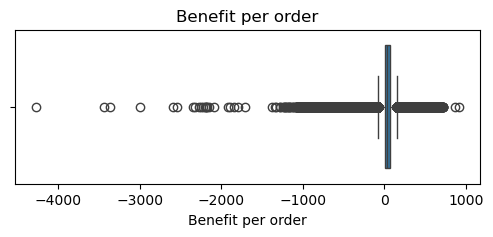

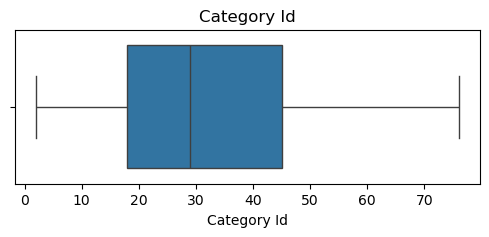

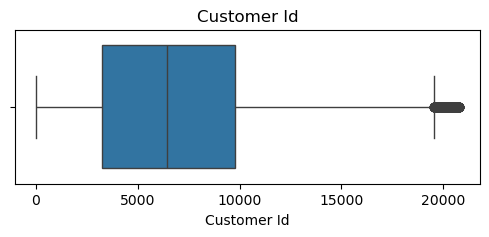

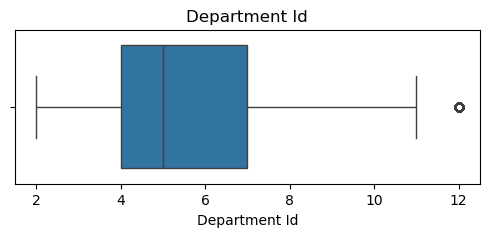

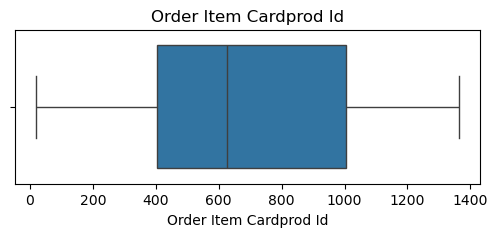

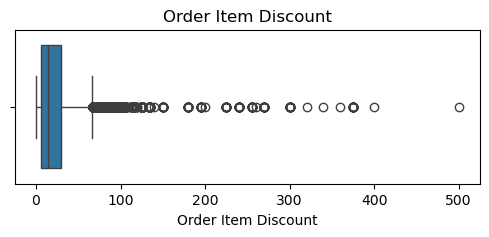

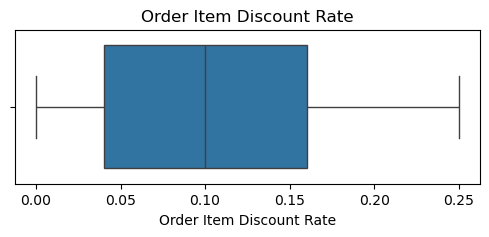

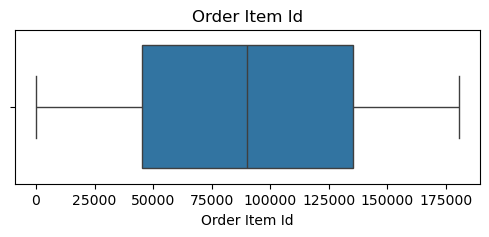

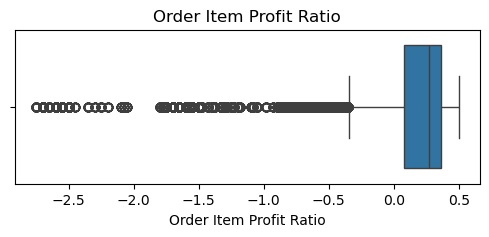

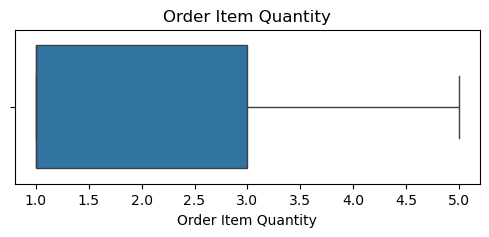

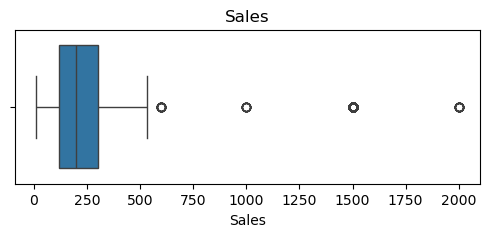

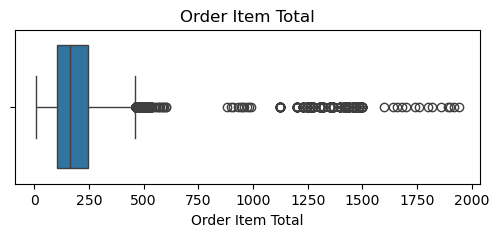

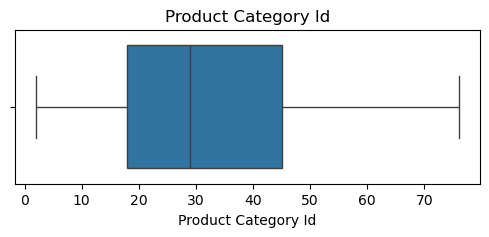

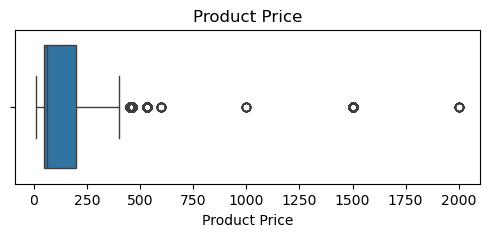

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_og[col])
    plt.title(col)
    plt.show()


| Column                    | Action     | Reason                                          |
| ------------------------- | ---------- | ----------------------------------------------- |
| `Benefit per order`       | **Cap**    | Large profits may be rare but real              |
| `Order Item Discount`     | **Remove** | Values > 500 likely errors                      |
| `Order Item Profit Ratio` | **Remove** | Negative profit likely due to issues or returns |
| `Sales`                   | **Cap**    | Big sales are real; don’t remove them           |
| `Order Item Total`        | **Cap**    | Same as above                                   |
| `Product Price`           | **Cap**    | Expensive products exist                        |


In [396]:
import pandas as pd
import numpy as np

# -------------------------------
# 1. CAPPING FUNCTION (Winsorizing)
# -------------------------------
def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return np.clip(series, lower, upper)

# -------------------------------
# 2. Remove outliers for specific columns
# -------------------------------

# a. Remove rows with extreme discounts
df = df_og[df_og['Order Item Discount'] <= 300]  # Cap at 300, or use 99th percentile if needed

# b. Remove rows with extremely negative profit ratios
df = df[df['Order Item Profit Ratio'] >= -1.0]  # Remove extremely negative profits (below -1.0)

# -------------------------------
# 3. Cap outliers for financial and product values
# -------------------------------

columns_to_cap = [
    'Benefit per order',
    'Sales',
    'Order Item Total',
    'Product Price'
]

for col in columns_to_cap:
    df[col] = cap_outliers(df[col], lower_quantile=0.01, upper_quantile=0.99)

# -------------------------------
# (Optional) Check changes
# -------------------------------
print(df[columns_to_cap + ['Order Item Discount', 'Order Item Profit Ratio']].describe())


       Benefit per order          Sales  Order Item Total  Product Price  \
count      174189.000000  174189.000000     174189.000000  174189.000000   
mean           34.610839     201.040858        180.604994     138.159747   
std            61.726938     114.794470        104.231089     121.289202   
min          -204.490005      24.990000         22.490000      15.990000   
25%             9.600000     119.980003        104.379997      50.000000   
50%            33.439999     199.919998        163.990005      59.990002   
75%            66.470001     299.950012        247.399994     199.990005   
max           184.309998     499.950012        464.950012     452.040008   

       Order Item Discount  Order Item Profit Ratio  
count        174189.000000            174189.000000  
mean             20.591672                 0.188817  
std              21.296829                 0.294317  
min               0.000000                -0.980000  
25%               5.400000                 0.

#   FROM 2017 Q4 -- PROFIT DECLINE ANALYSIS

### Total Profit Vs Month

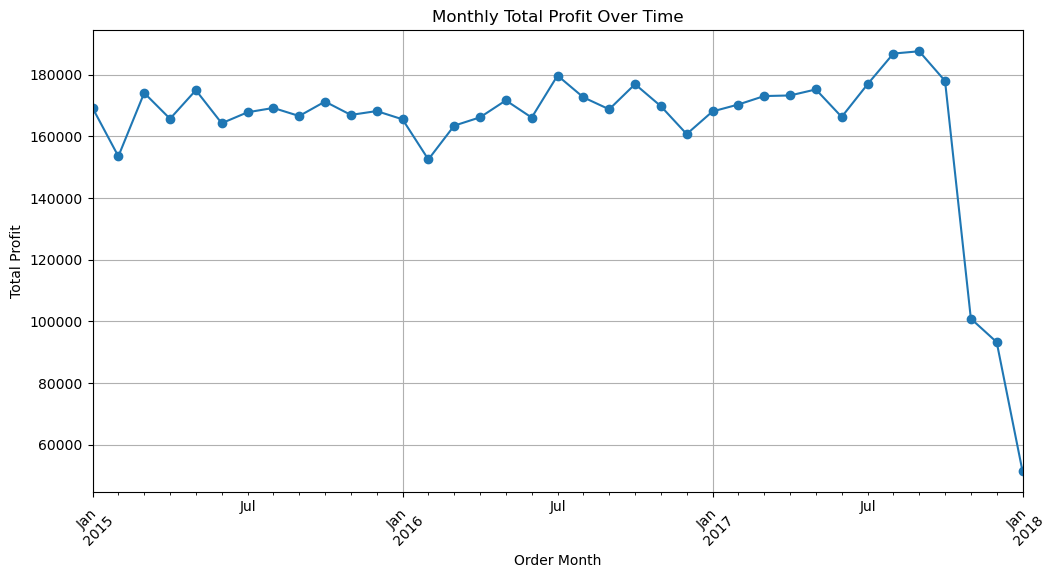

In [397]:
df.loc[:, 'Order Month'] = df['order date (DateOrders)'].dt.to_period('M')

monthly_profit = df.groupby('Order Month')['Order Profit Per Order'].sum()

plt.figure(figsize=(12,6))
monthly_profit.plot(kind='line', marker='o')
plt.title('Monthly Total Profit Over Time')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Drop analysis

In [398]:
df_ana = df.copy()

# Ensure datetime is parsed correctly
df_ana.loc[:, 'order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Extract Order Quarter
df_ana.loc[:, 'Order Quarter'] = df_ana['order date (DateOrders)'].dt.to_period('Q')

# Calculate discount value per row
df_ana.loc[:, 'Discount Value'] = df_ana['Order Item Discount'] * df_ana['Order Item Quantity']

# Group by quarter including discount value
quarterly_metrics = df_ana.groupby('Order Quarter').agg({
    'Order Profit Per Order': 'sum',
    'Order Id': 'nunique',
    'Order Item Total': 'sum',
    'Customer Id': 'nunique',
    'shipping Delay (Days)': 'mean',
    'Order Item Discount': 'mean',
    'Discount Value': 'sum'
}).rename(columns={
    'Order Profit Per Order': 'Total Profit',
    'Order Id': 'Order Count',
    'Order Item Total': 'Total Sales',
    'Customer Id': 'Customer Count',
    'shipping Delay (Days)': 'Avg Shipping Delay',
    'Order Item Discount': 'Avg Discount',
    'Discount Value': 'Total Discount Value'
})

# Display recent quarters
print(quarterly_metrics.tail(6))


                Total Profit  Order Count   Total Sales  Customer Count  \
Order Quarter                                                             
2016Q4         507529.900078         5227  2.713557e+06            4277   
2017Q1         511564.310157         5103  2.666582e+06            4169   
2017Q2         514864.760472         5132  2.752359e+06            4201   
2017Q3         551429.300033         5229  2.900357e+06            4268   
2017Q4         372181.829567         6041  1.509243e+06            6041   
2018Q1          51383.489994         2045  2.884764e+05            2045   

               Avg Shipping Delay  Avg Discount  Total Discount Value  
Order Quarter                                                          
2016Q4                   3.458605     19.948630         718151.651258  
2017Q1                   3.488865     20.098151         709979.651208  
2017Q2                   3.484046     20.883568         708772.431019  
2017Q3                   3.442749     2

In [399]:
from scipy.stats import f_oneway

# Ensure 'Order Quarter' and 'Order Profit Per Order' are available
if 'Order Quarter' not in df_ana.columns:
    df_ana['Order Quarter'] = df_ana['order date (DateOrders)'].dt.to_period('Q')

# Drop any missing values
anova_data = df_ana[['Order Quarter', 'Order Profit Per Order']].dropna()

# Group order profits by quarter
groups = [
    group['Order Profit Per Order'].values
    for _, group in anova_data.groupby('Order Quarter')
    if len(group) > 1  # ensure at least two samples for ANOVA
]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)

print("📊 ANOVA Results (Order Profit Per Order across quarters):")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ Statistically significant difference in order profit across quarters.")
else:
    print("❌ No significant difference in order profit across quarters.")


📊 ANOVA Results (Order Profit Per Order across quarters):
F-statistic: 81.56
p-value: 0.000000
✅ Statistically significant difference in order profit across quarters.


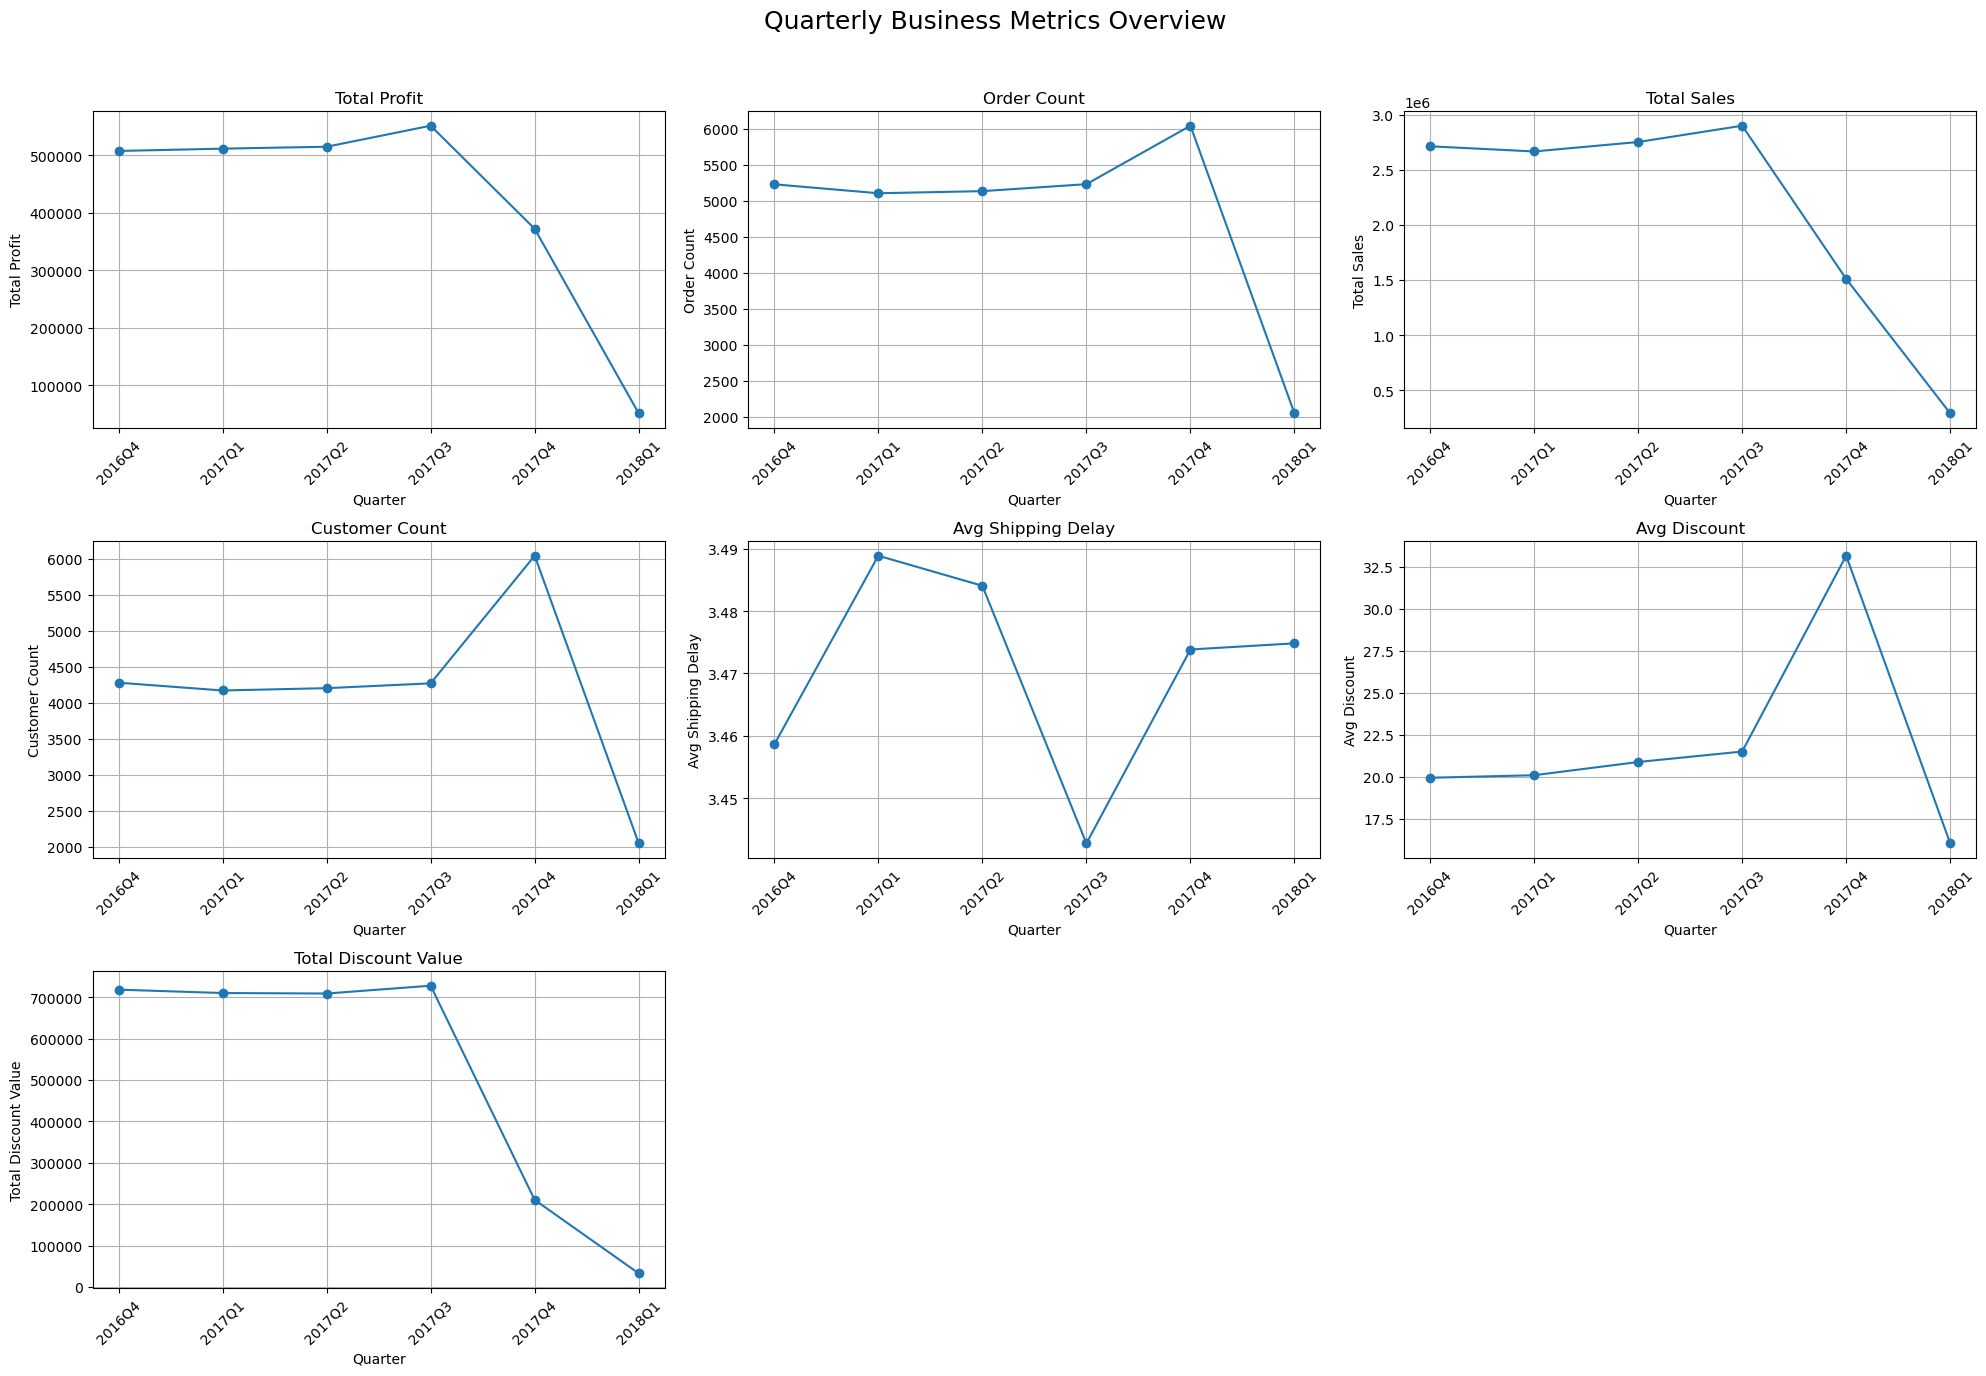

In [400]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data from your new summary including 2018Q1
data = {
    'Total Profit': [
        507529.900078,
        511564.310157,
        514864.760472,
        551429.300033,
        372181.829567,
        51383.489994
    ],
    'Order Count': [
        5227,
        5103,
        5132,
        5229,
        6041,
        2045
    ],
    'Total Sales': [
        2.713557e6,
        2.666582e6,
        2.752359e6,
        2.900357e6,
        1.509243e6,
        2.884764e5
    ],
    'Customer Count': [
        4277,
        4169,
        4201,
        4268,
        6041,
        2045
    ],
    'Avg Shipping Delay': [
        3.458605,
        3.488865,
        3.484046,
        3.442749,
        3.473829,
        3.474817
    ],
    'Avg Discount': [
        19.948630,
        20.098151,
        20.883568,
        21.505762,
        33.146212,
        16.047653
    ],
    'Total Discount Value': [
        718151.651258,
        709979.651208,
        708772.431019,
        727637.201134,
        210294.299672,
        32817.449854
    ]
}

# Index representing quarters
index = ['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1']
df_ana = pd.DataFrame(data, index=index)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 14))
fig.suptitle('Quarterly Business Metrics Overview', fontsize=18)

metrics = df_ana.columns.tolist()
axes = axes.flatten()

for i, metric in enumerate(metrics):
    df_ana[metric].plot(ax=axes[i], marker='o', linestyle='-', color='tab:blue')
    axes[i].set_title(metric, fontsize=12)
    axes[i].set_xlabel('Quarter')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots (if < 9 metrics)
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### IN 2017 Q4 – DROP ANALYSIS 

#### Why is the **Total Discount Value** low (\~210K) while the **Average Discount** is high (\~33.15%)?

#### 1. **Spike in Order Count does not translate to higher Sales**

* **Order Count in 2017 Q4**: **6041** (highest among all quarters).
* But **Total Sales** dropped sharply to **\~1.51 million**, down from **\~2.90 million in 2017 Q3**.
* This suggests that although **more orders were placed**, they were likely of **low value or deeply discounted**, which reduced total revenue.

#### 2. **Extremely High Average Discount (\~33.15%)**

* This is **the highest discount average** across all quarters.
* A high average discount combined with low sales suggests **intensive discounting campaigns**, possibly on **less expensive items**.

#### 3. **Low Total Discount Value (\~210K)**

* Despite the higher average discount, the **Total Discount Value** dropped from **\~727K in Q3** to **\~210K in Q4**.
* This can be explained by:

  * Lower priced products being sold (less absolute discount per item).
  * Discounts applied to a narrower set of products.
  * Customers possibly buying **only highly discounted items**, reducing gross discount totals even further.

#### 4. **Drop in Total Profit**

* **Total Profit** fell from **\~551K in Q3** to **\~372K in Q4**, showing reduced profitability—likely due to **aggressive discounting without sufficient sales volume**.


### Summary

In **2017 Q4**, the business appears to have run **heavy discounting campaigns**. However, this did **not lead to higher sales volume or revenue**. The high average discount reflects the intensity of markdowns, but the lower total sales and discount value suggest that customers either:

* Bought fewer or cheaper items, or
* Took advantage of steep discounts on a limited number of products.

**Recommendation**: Review Q4 discounting strategy—consider whether the depth of discounts was justified and whether it targeted the right products and segments to drive profitable growth.


## Recommendations to Improve Future Quarters (Up to Q4 2017)

### 1. **Customer Retention & Loyalty**

**Observation:** Although Order Count increased sharply in Q4 2017, Total Sales and Profit dropped significantly, indicating potentially low-value or one-time buyers.

**Recommendation:**

* Develop **loyalty programs** to encourage repeat purchases and increase customer lifetime value.
* Implement **email remarketing** targeting customers who bought during Q4 with tailored offers.
* Promote **subscription models** or **product bundles** to incentivize more frequent purchases.


### 2. **Refine Discount Strategy**

**Observation:** Q4 2017 had the highest average discount (\~33%) but saw a large drop in total sales and total discount value.

**Recommendation:**

* Use **targeted discounting** — offer higher discounts to price-sensitive segments while protecting margins on loyal or premium customers.
* Avoid blanket steep discounts that erode profitability; focus on **dynamic pricing** aligned with inventory and demand.
* Experiment with **time-limited offers** to create urgency without sacrificing overall profitability.


### 3. **Product & Sales Focus**

**Observation:** Significant drop in Total Sales and Profit despite high order volume.

**Recommendation:**

* Identify **best-selling and highest-margin products** and prioritize promotions around them.
* Consider phasing out or repricing **low-margin or slow-moving SKUs** to optimize inventory.
* Conduct an **ABC analysis** to allocate resources effectively.


### 4. **Shipping & Delivery Improvements**

**Observation:** Average shipping delay remained fairly consistent (\~3.45 days) but could be a competitive factor.

**Recommendation:**

* Introduce **faster or guaranteed shipping options** to improve customer satisfaction.
* Enhance **post-purchase communication** and tracking transparency.
* Use shipping experience as a **competitive differentiator** in marketing.


### 5. **Sales Channel Optimization**

**Observation:** Despite more orders in Q4 2017, sales value dropped, possibly due to shifts in customer acquisition.

**Recommendation:**

* Audit marketing and sales channels for efficiency — are channels driving quality traffic and conversions?
* Invest in **seasonal paid promotions** and social media campaigns tailored for Q4 demand.
* Optimize **mobile and web experiences** to reduce friction and increase conversion rates.


### 6. **Predictive Analytics & Seasonal Planning**

**Observation:** Q4 2017 shows unusual patterns in sales and discounting.

**Recommendation:**

* Develop **forecasting models** to anticipate seasonal trends and prepare inventory and marketing strategies accordingly.
* Plan **seasonal campaigns** to maximize sales during peak quarters and mitigate drop-offs.
* Use historical data to fine-tune discount levels and product assortments by season.


### 7. **Customer Feedback Collection**

**Observation:** Data lacks insight into *why* customers behaved this way in Q4 2017.

**Recommendation:**

* Deploy **customer surveys** and feedback tools to understand satisfaction drivers.
* Use **Net Promoter Scores (NPS)** or exit surveys to gather qualitative insights.
* Leverage feedback to improve product offerings, pricing, and customer experience.



| **Category**              | **Suggested Actions**                                 | **Why This Helps**                                              |
| ------------------------- | ----------------------------------------------------- | --------------------------------------------------------------- |
| **Customer Engagement**   | Loyalty programs, remarketing campaigns               | Encourages repeat purchases, increases customer lifetime value  |
| **Discount Strategy**     | Segmented discounts, time-limited offers              | Protects margins, targets price-sensitive customers effectively |
| **Sales Optimization**    | Promote high-margin products, conduct ABC analysis    | Focus resources on most profitable items                        |
| **Shipping & Experience** | Faster delivery options, improved UX and tracking     | Enhances satisfaction, builds competitive advantage             |
| **Channel Growth**        | Audit sales channels, invest in paid & social ads     | Ensures quality traffic and conversions                         |
| **Forecasting**           | Use machine learning models to plan seasonality       | Anticipates demand fluctuations and optimizes inventory         |
| **Voice of Customer**     | Conduct surveys, collect feedback                     | Gains insights into customer needs and reasons for churn        |
| **Winback Campaigns**     | Reactivate dormant customers with personalized offers | Recaptures lost revenue, re-engages valuable buyers             |



# EDA - PROFITS AND CUSTOMER INSIGHTS

## Profit Distribution & Relationships

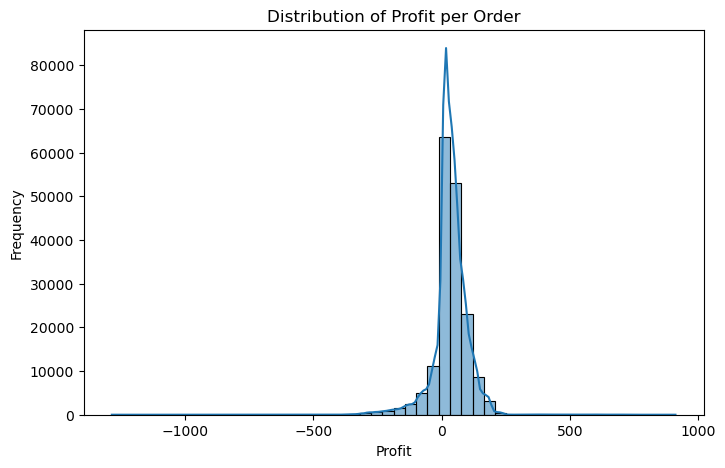

In [401]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Order Profit Per Order'], bins=50, kde=True)
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

###  Profit vs. Sales

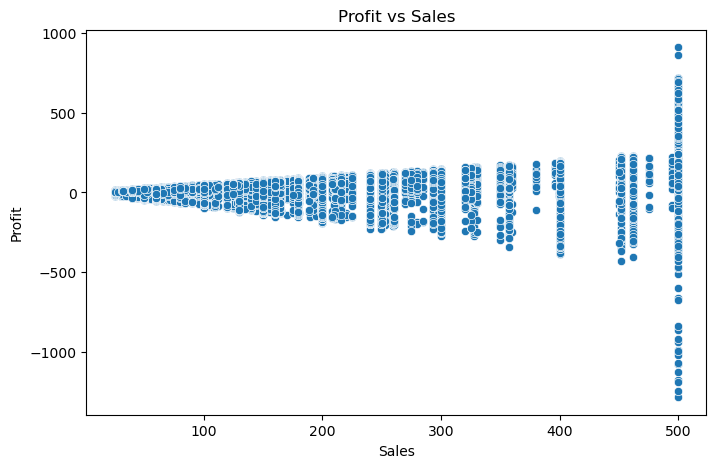

In [402]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


## Profitability by Category

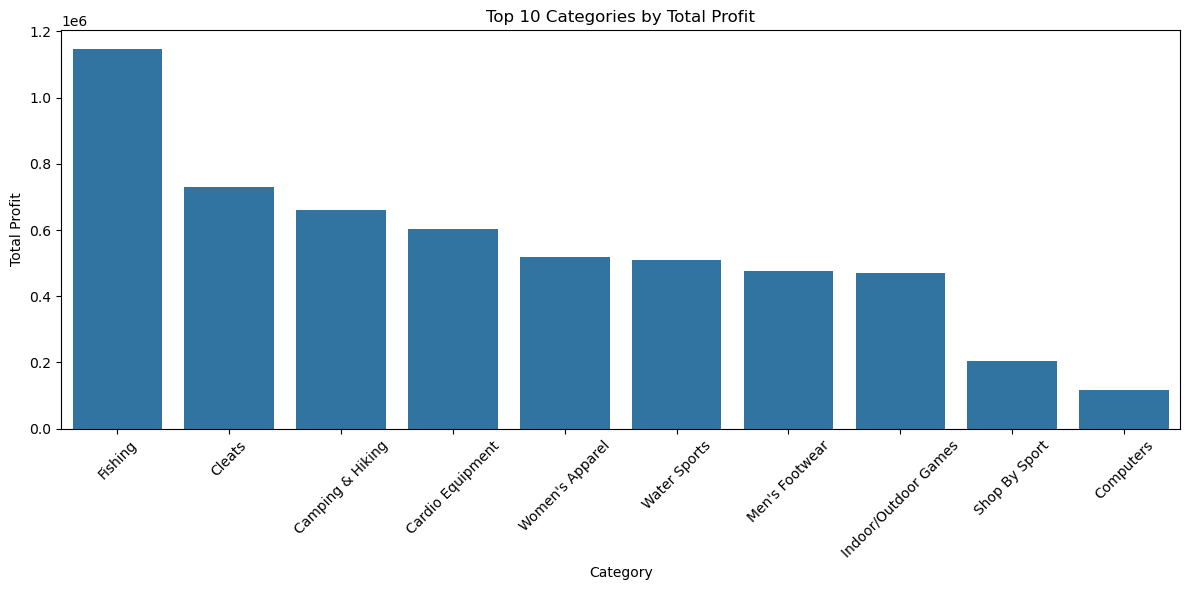

In [403]:
plt.figure(figsize=(12, 6))
# Top 10 Categories by Total Profit
profit_by_category = (
    df.groupby('Category Name')['Order Profit Per Order']
    .sum()
    .sort_values(ascending=False)
    .head(10)  
)

# Plot
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Total Profit")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


## Does Shipping Delay Affect Profit?

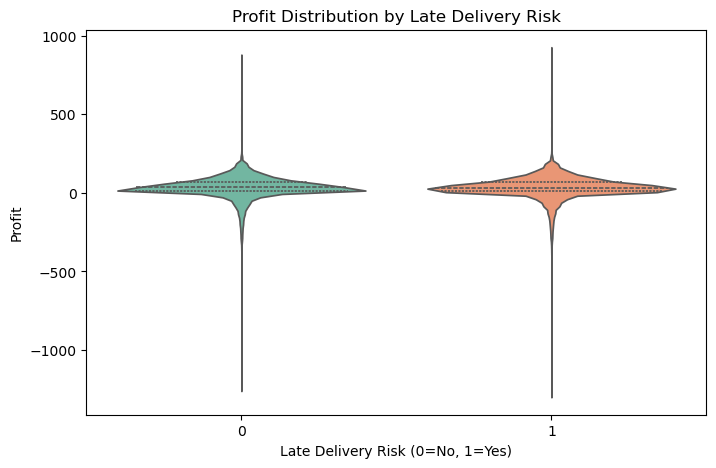

In [404]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Late_delivery_risk', y='Order Profit Per Order', data=df, inner='quartile', palette='Set2')
plt.title("Profit Distribution by Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0=No, 1=Yes)")
plt.ylabel("Profit")
plt.show()


## Factors affecting Profit

### Product Price vs Profit

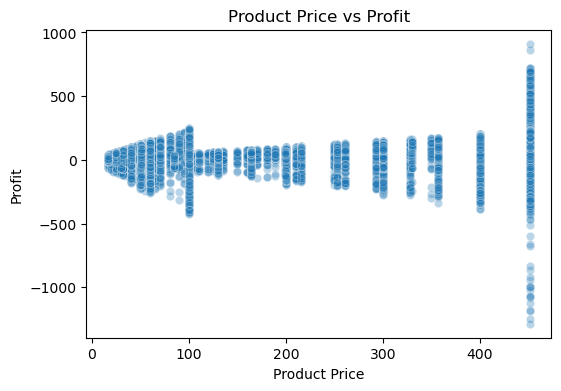

In [405]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Product Price', y='Order Profit Per Order', data=df, alpha=0.3)
plt.title('Product Price vs Profit')
plt.xlabel('Product Price')
plt.ylabel('Profit')
plt.show()

## Profit by customer segment

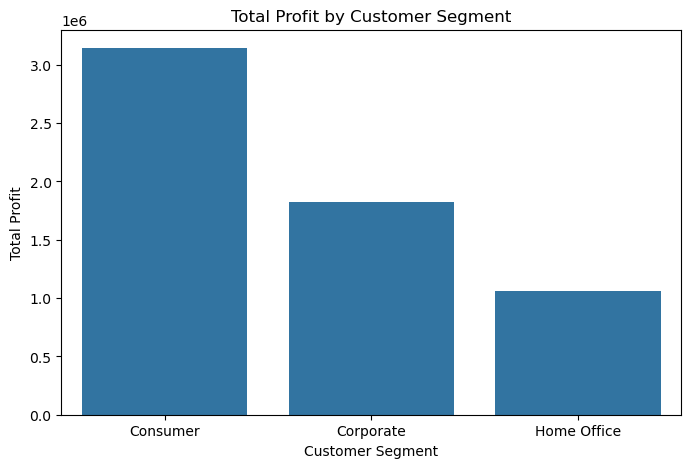

In [406]:
plt.figure(figsize=(8, 5))
segment_profit = df.groupby('Customer Segment')['Order Profit Per Order'].sum().sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title("Total Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Profit")
plt.show()

## Correlation Heatmap:

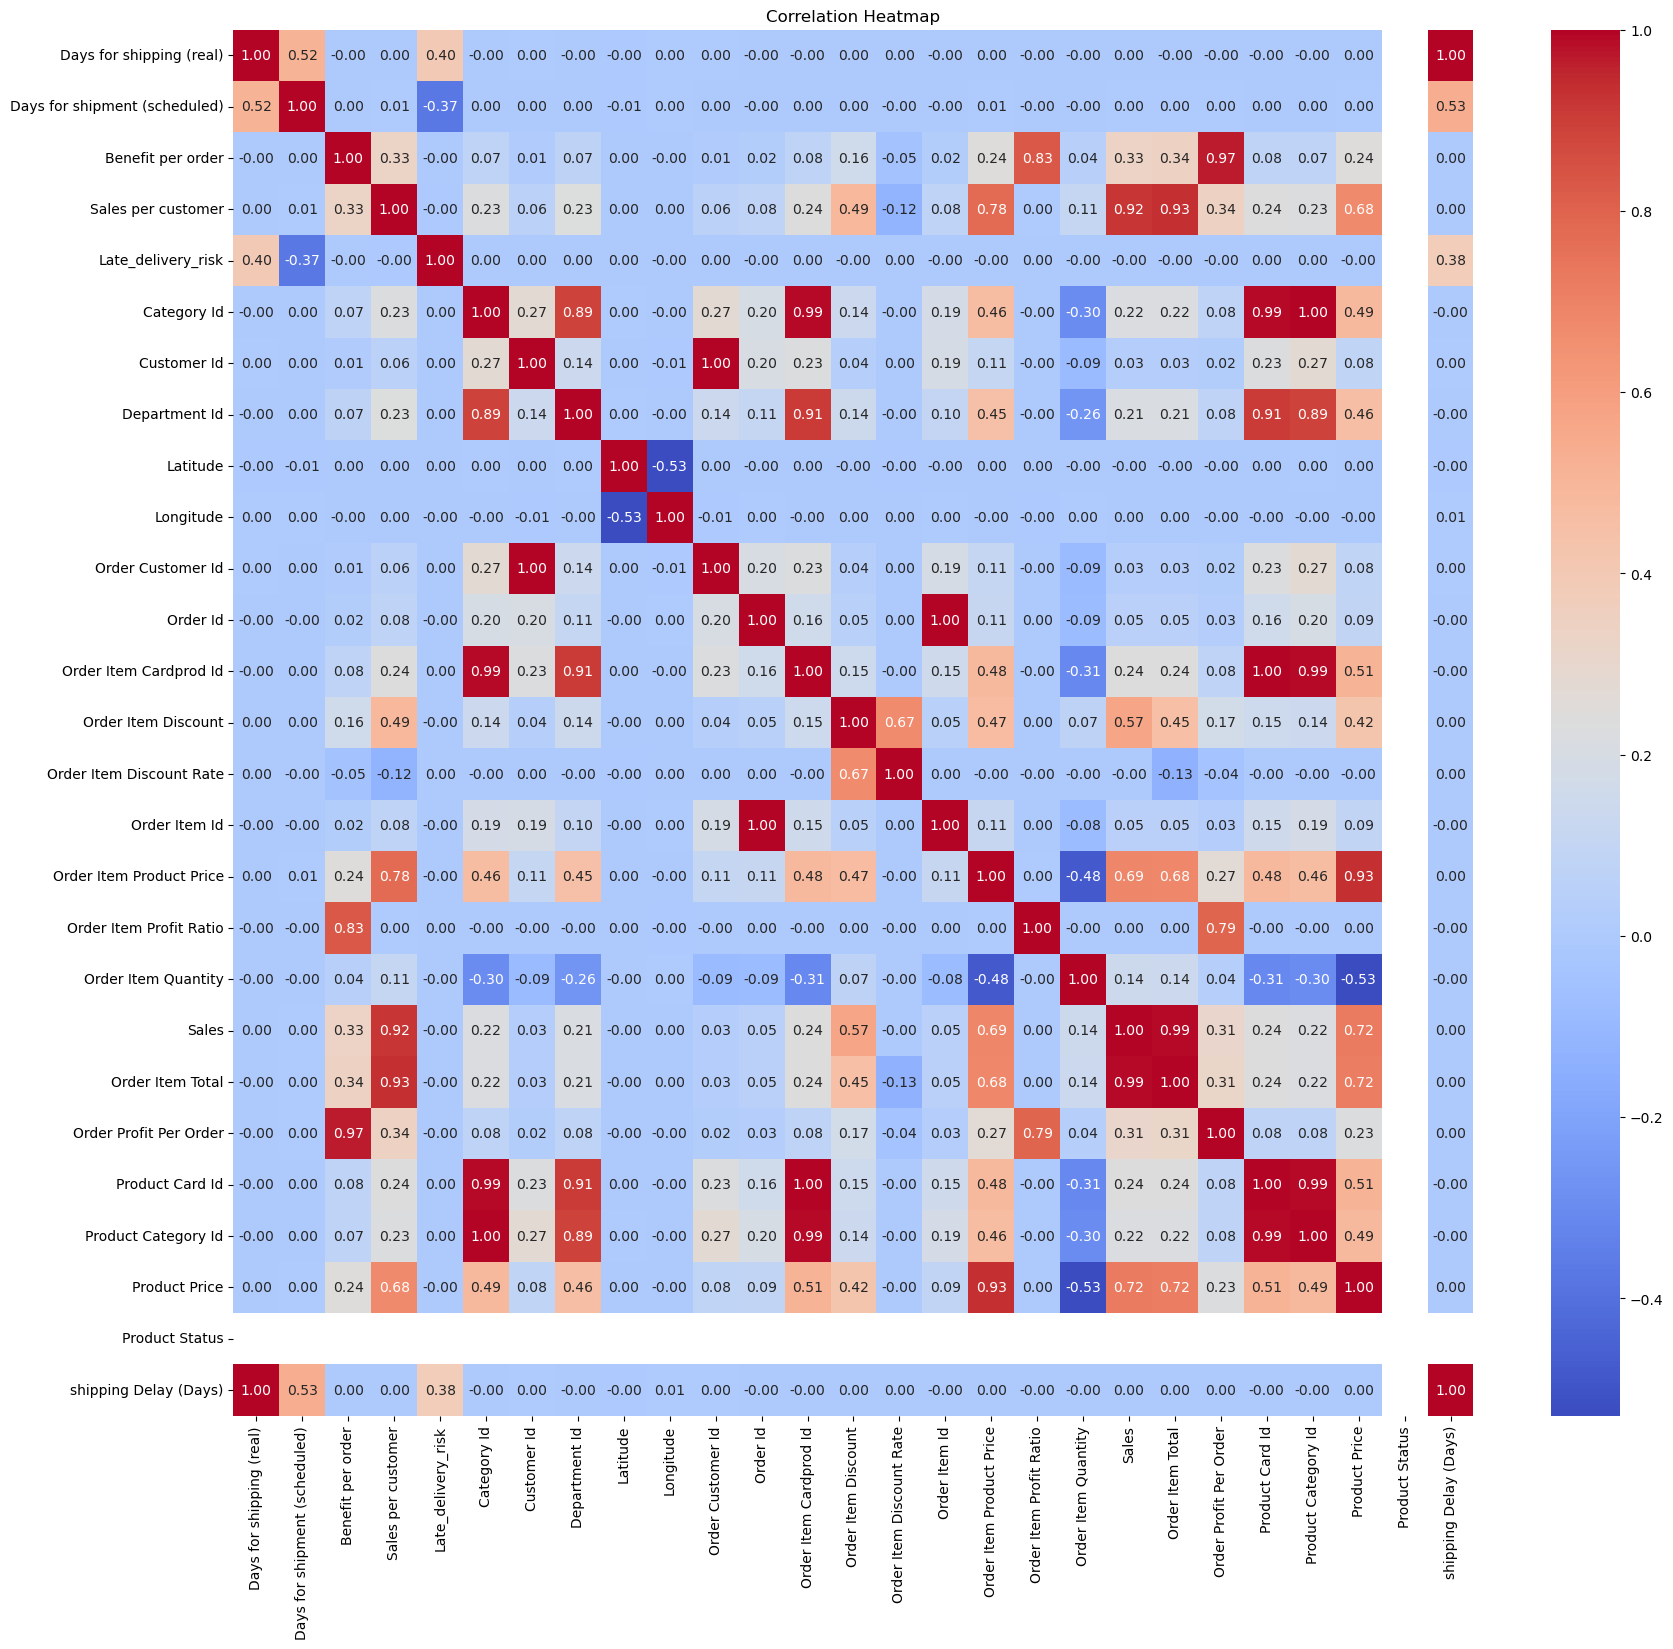

In [407]:
plt.figure(figsize=(20, 18))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


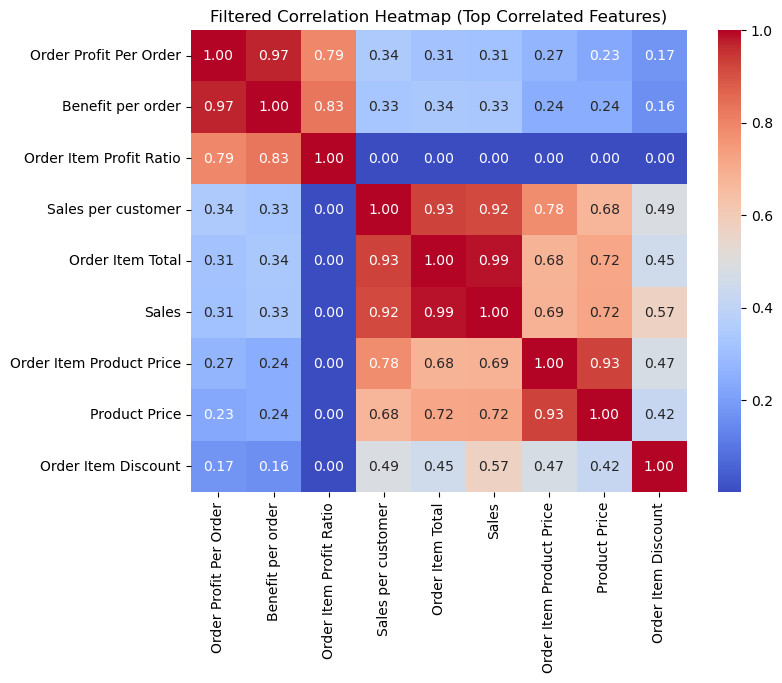

In [408]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include='number')

# Get correlation with target variable
target_corr = numeric_cols.corr()['Order Profit Per Order'].sort_values(ascending=False)

# Top correlations (optional: set threshold like >0.1 or <-0.1)
strong_corrs = target_corr[abs(target_corr) > 0.1].index

plt.figure(figsize=(8, 6))
sns.heatmap(df[strong_corrs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Filtered Correlation Heatmap (Top Correlated Features)")
plt.show()



### Profit by Product Category

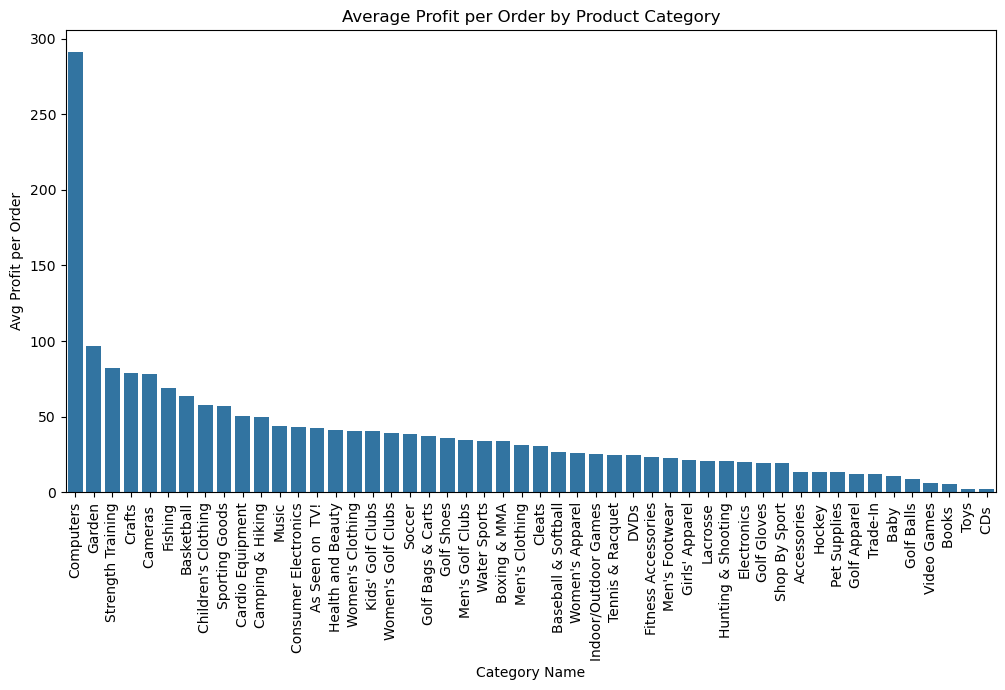

In [409]:
plt.figure(figsize=(12,6))
category_profit = df.groupby('Category Name')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Average Profit per Order by Product Category')
plt.xticks(rotation=90)
plt.ylabel('Avg Profit per Order')
plt.show()


### Profit by Region

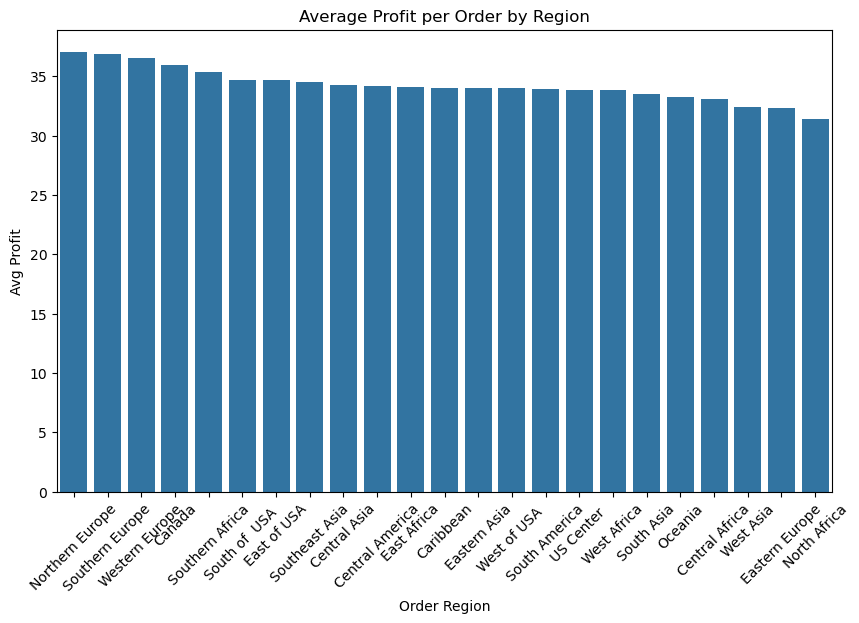

In [410]:
plt.figure(figsize=(10,6))
region_profit = df.groupby('Order Region')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Average Profit per Order by Region')
plt.ylabel('Avg Profit')
plt.xticks(rotation=45)
plt.show()


# Order Profitability Prediction 

## Prepare Data for Regression Modeling

## Profit Distribution & Relationships

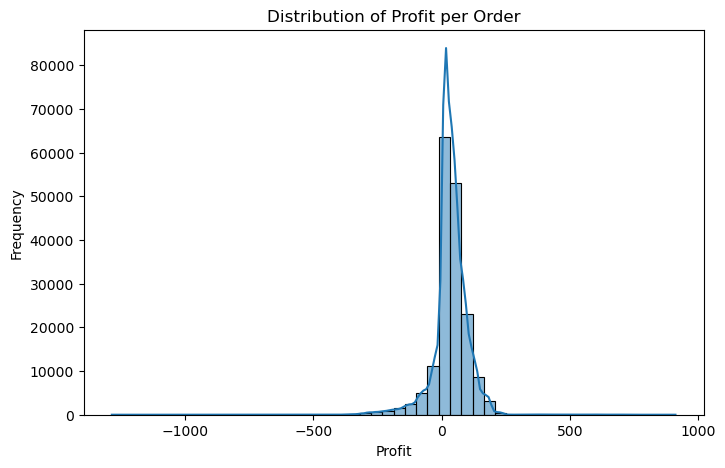

In [411]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Order Profit Per Order'], bins=50, kde=True)
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

In [412]:
# Step 1: Calculate Q1 and Q3
Q1 = df['Order Profit Per Order'].quantile(0.25)
Q3 = df['Order Profit Per Order'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df = df[(df['Order Profit Per Order'] >= lower_bound) & (df['Order Profit Per Order'] <= upper_bound)]

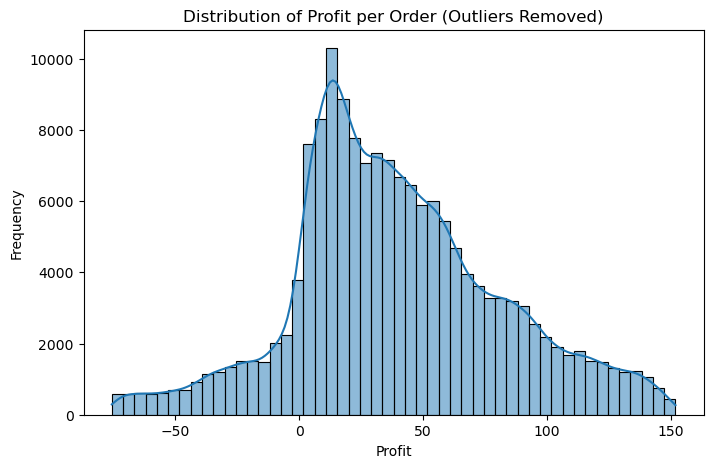

In [413]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Order Profit Per Order'], bins=50, kde=True)
plt.title("Distribution of Profit per Order (Outliers Removed)")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

###  Profit vs. Sales

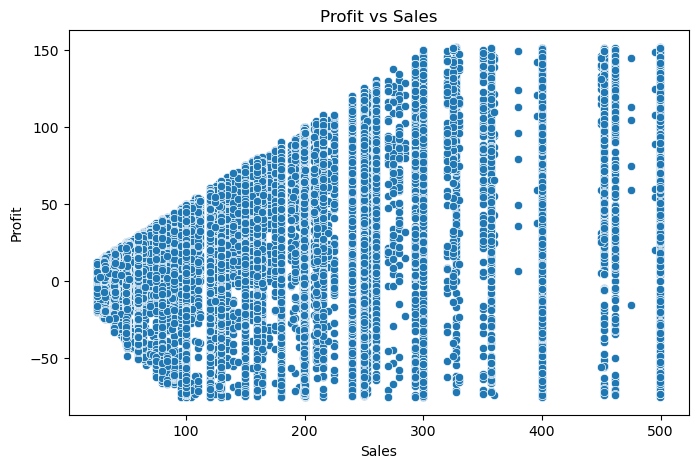

In [414]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


## Profitability by Category

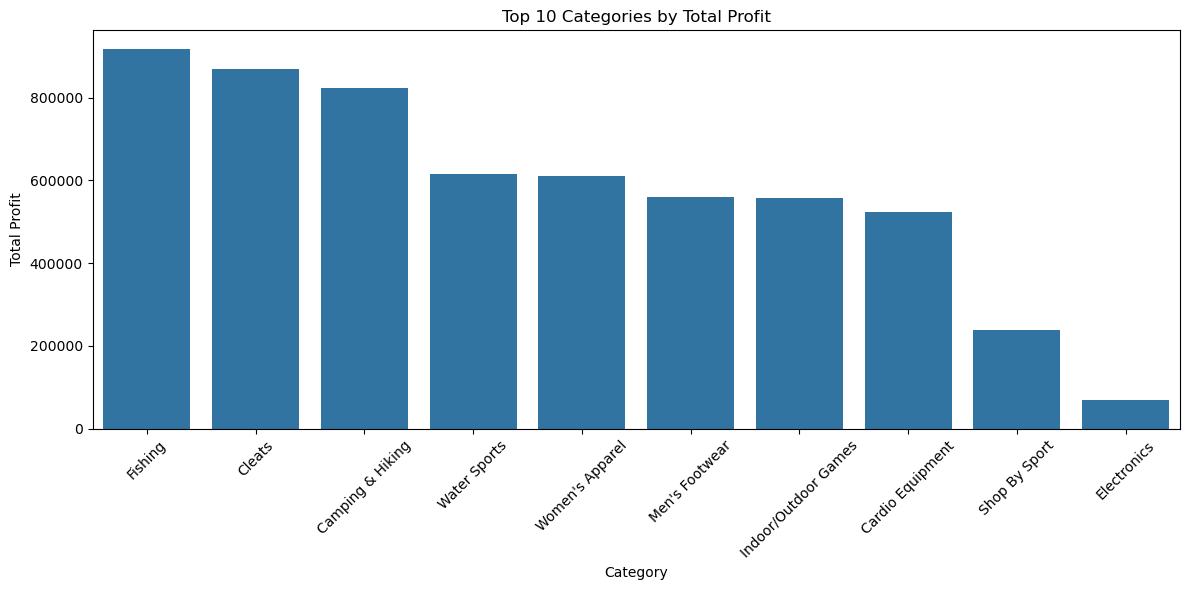

In [415]:
plt.figure(figsize=(12, 6))
# Top 10 Categories by Total Profit
profit_by_category = (
    df.groupby('Category Name')['Order Profit Per Order']
    .sum()
    .sort_values(ascending=False)
    .head(10)  
)

# Plot
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Total Profit")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


## Does Shipping Delay Affect Profit?

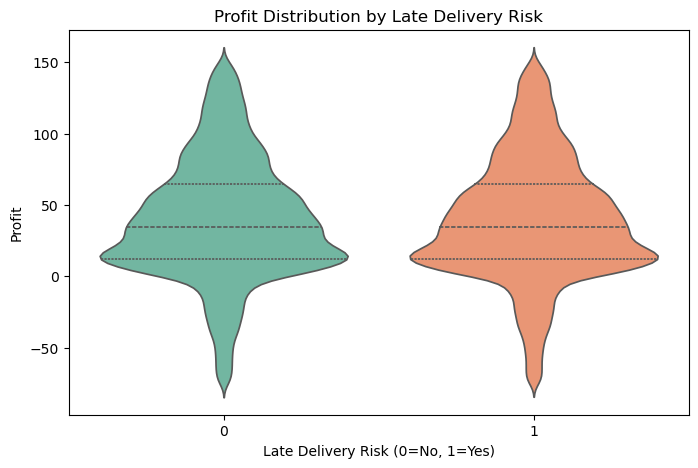

In [416]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Late_delivery_risk', y='Order Profit Per Order', data=df, inner='quartile', palette='Set2')
plt.title("Profit Distribution by Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0=No, 1=Yes)")
plt.ylabel("Profit")
plt.show()


## Factors affecting Profit

### Product Price vs Profit

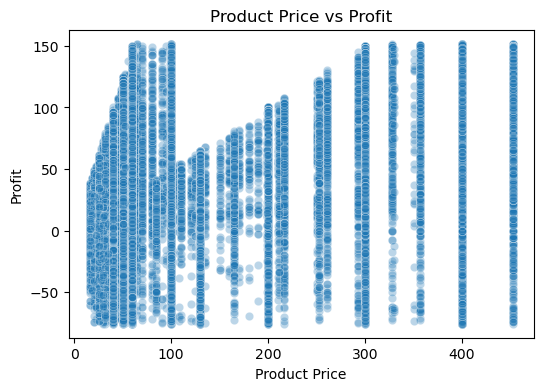

In [417]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Product Price', y='Order Profit Per Order', data=df, alpha=0.3)
plt.title('Product Price vs Profit')
plt.xlabel('Product Price')
plt.ylabel('Profit')
plt.show()

## Profit by customer segment

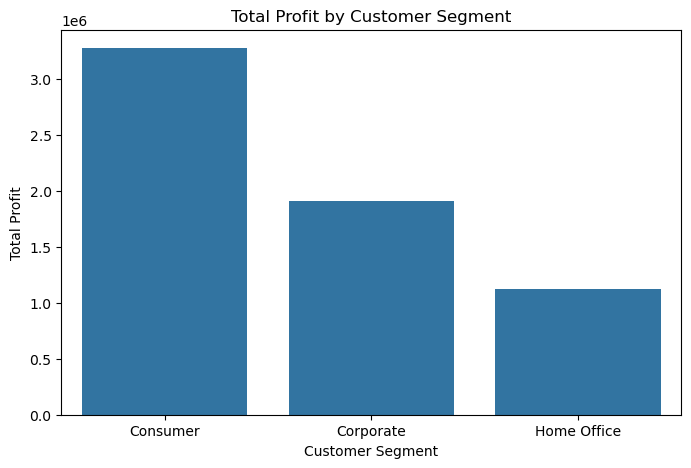

In [418]:
plt.figure(figsize=(8, 5))
segment_profit = df.groupby('Customer Segment')['Order Profit Per Order'].sum().sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title("Total Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Profit")
plt.show()

## Correlation Heatmap:

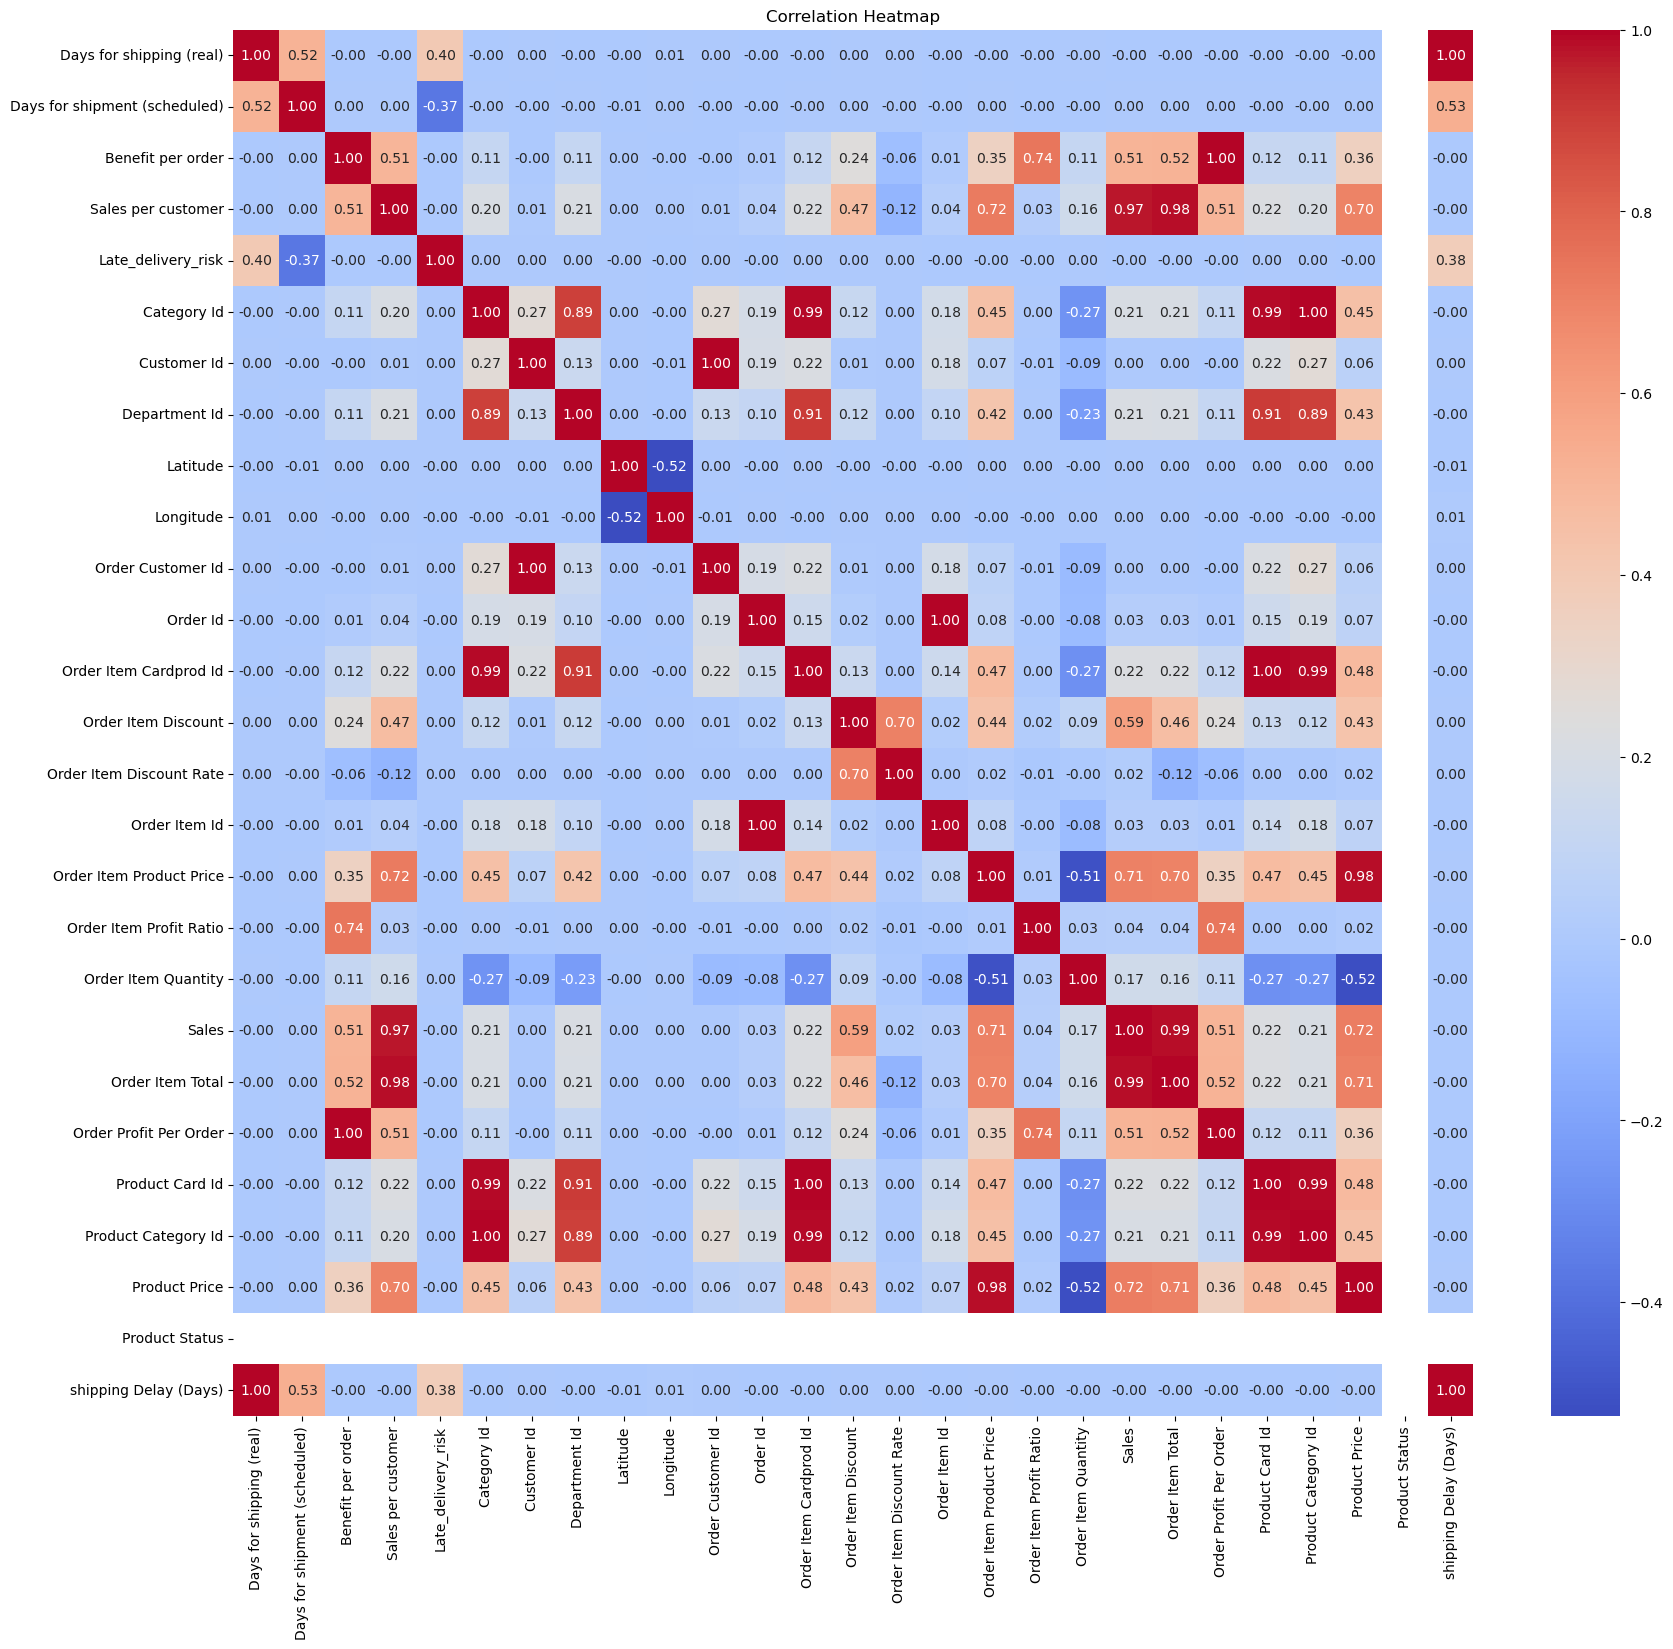

In [419]:
plt.figure(figsize=(20, 18))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


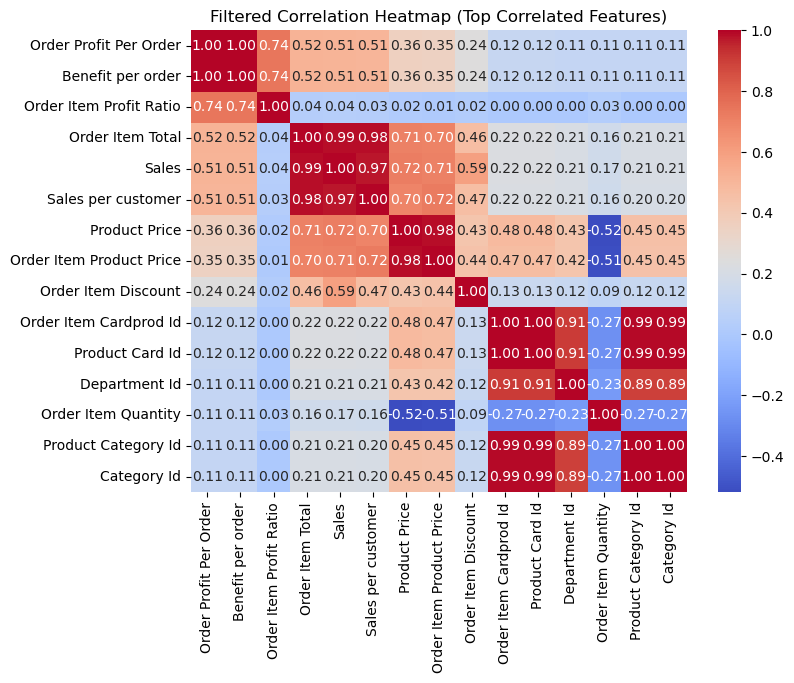

In [420]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include='number')

# Get correlation with target variable
target_corr = numeric_cols.corr()['Order Profit Per Order'].sort_values(ascending=False)

# Top correlations (optional: set threshold like >0.1 or <-0.1)
strong_corrs = target_corr[abs(target_corr) > 0.1].index

plt.figure(figsize=(8, 6))
sns.heatmap(df[strong_corrs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Filtered Correlation Heatmap (Top Correlated Features)")
plt.show()



### Profit by Product Category

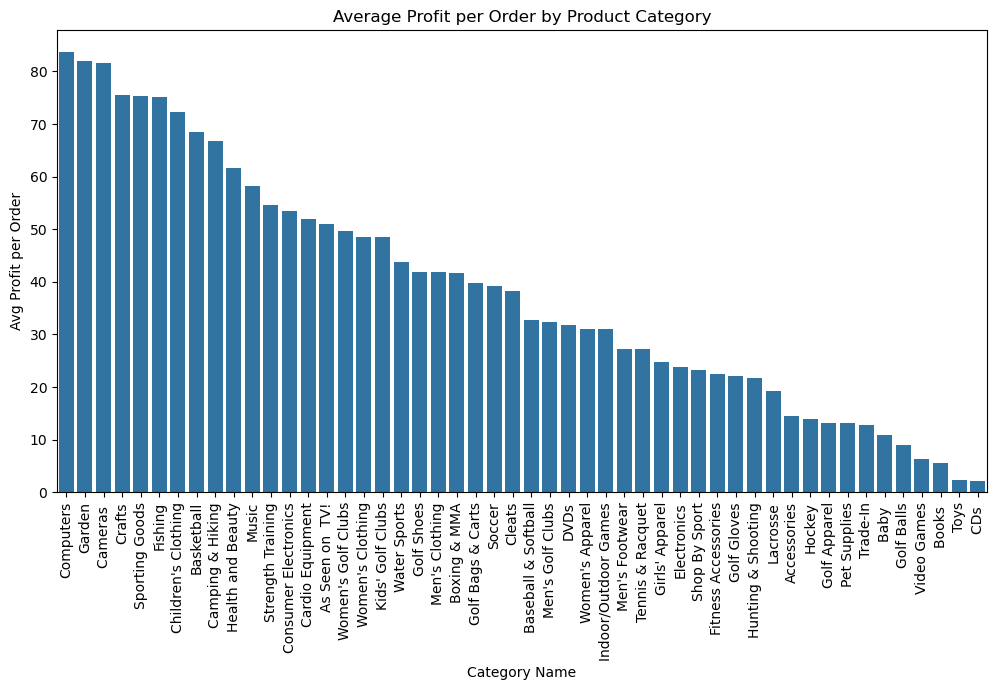

In [421]:
plt.figure(figsize=(12,6))
category_profit = df.groupby('Category Name')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Average Profit per Order by Product Category')
plt.xticks(rotation=90)
plt.ylabel('Avg Profit per Order')
plt.show()


### Profit by Region

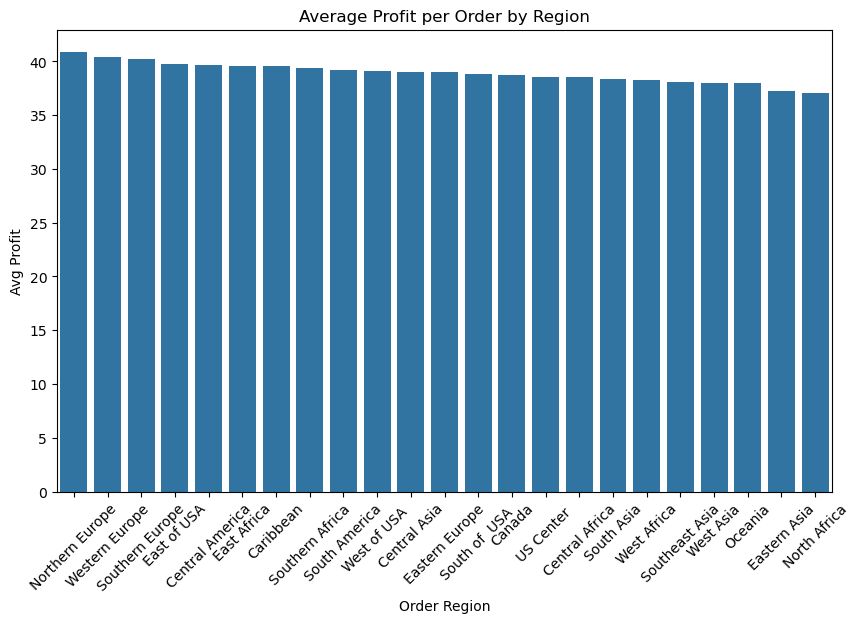

In [422]:
plt.figure(figsize=(10,6))
region_profit = df.groupby('Order Region')['Order Profit Per Order'].mean().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Average Profit per Order by Region')
plt.ylabel('Avg Profit')
plt.xticks(rotation=45)
plt.show()


In [423]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Make a copy to work safely
df_model = df.copy()

# ✅ Choose target variable
target = 'Order Profit Per Order'

# ✅ Select initial feature candidates (numeric + low-cardinality categorical)
features = [
    'Order Item Quantity',
    'Order Item Discount',
    'Order Item Product Price',
    'Order Item Total',
    'Product Price',
    'Sales',
    'Order Item Profit Ratio',
    'Order Region',
    'Order State',
    'Shipping Mode',
    'Category Name',
    'Department Name',
    'Customer Segment'
]

# ✅ Separate features and target
X = df_model[features]
y = df_model[target]

# ✅ Identify categorical features
cat_cols = X.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ✅ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


## XGBoost Model + Evaluation

In [424]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


📊 Model Evaluation:
MAE:  0.41
RMSE: 0.64
R²:   0.9998


### Feature Importance

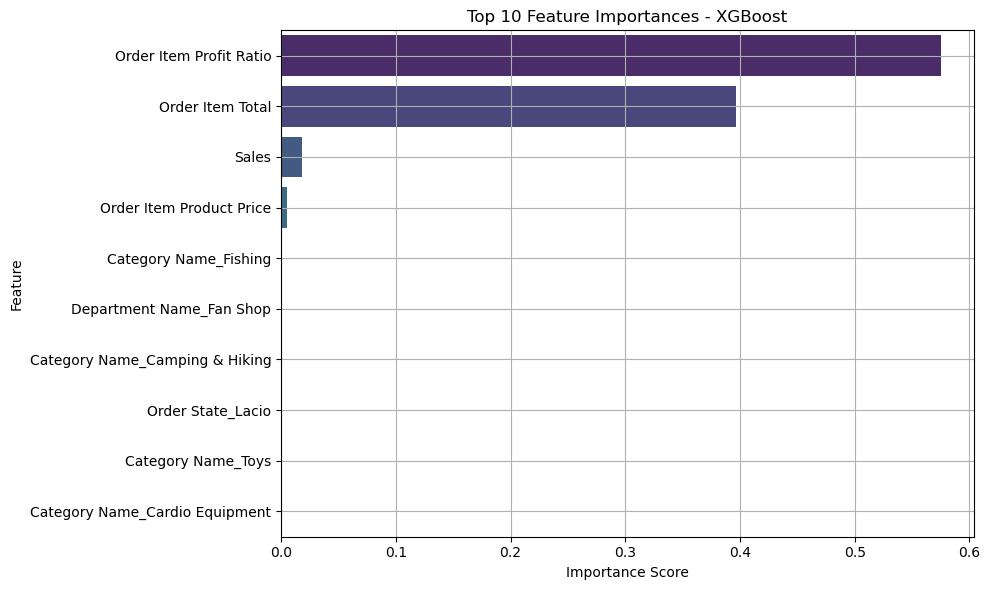

In [425]:
# Get feature importance from the trained model
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort and visualize top 15
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis", legend=False)
plt.title('Top 10 Feature Importances - XGBoost') 
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


# CUSTOMER SEGMENTATION

## CUSTOMER SEGMENTATION AND ANALYSIS

### DATA PREPERATION:

In [426]:
import pandas as pd

# Group data at customer level
customer_data = df.groupby('Customer Id').agg({
    'Order Id': 'nunique',  # Frequency
    'Sales': 'sum',         # Monetary
    'order date (DateOrders)': 'max',  # Recency
    'Order Item Quantity': 'sum',
    'Order Profit Per Order': 'mean',
    'Late_delivery_risk': 'mean'
}).reset_index()

# Rename columns
customer_data.columns = ['Customer Id', 'Order Frequency', 'Total Sales', 'Last Order Date',
                         'Total Quantity', 'Avg Profit per Order', 'Avg Late Delivery Risk']

# Calculate Recency in days from most recent date
latest_date = df['order date (DateOrders)'].max()
customer_data['Recency (Days)'] = (latest_date - customer_data['Last Order Date']).dt.days

# Drop original date column
customer_data.drop(columns='Last Order Date', inplace=True)

# Preview
customer_data.head()

,Customer Id,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
0,2,3,1719.770035,17,37.826666,0.333333,136
1,3,4,2909.720078,30,52.814667,0.000000,229
2,4,4,1269.740015,26,10.429166,0.750000,380
3,5,3,1274.750023,18,44.264286,0.714286,457
4,6,4,2759.560013,42,48.405000,0.642857,646


### Data Normalization for Clustering

In [427]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
features_to_cluster = customer_data.drop(columns=['Customer Id'])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_features = scaler.fit_transform(features_to_cluster)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=features_to_cluster.columns)
scaled_df.head()


,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
0,-0.120029,0.079807,-0.052896,-0.047738,-0.573199,-0.482162
1,0.298743,0.896478,0.698687,0.429488,-1.462194,-0.030335
2,0.298743,-0.229051,0.467431,-0.920089,0.538044,0.703277
3,-0.120029,-0.225613,0.004918,0.157239,0.442794,1.077370
4,0.298743,0.793422,1.392456,0.289082,0.252296,1.995599


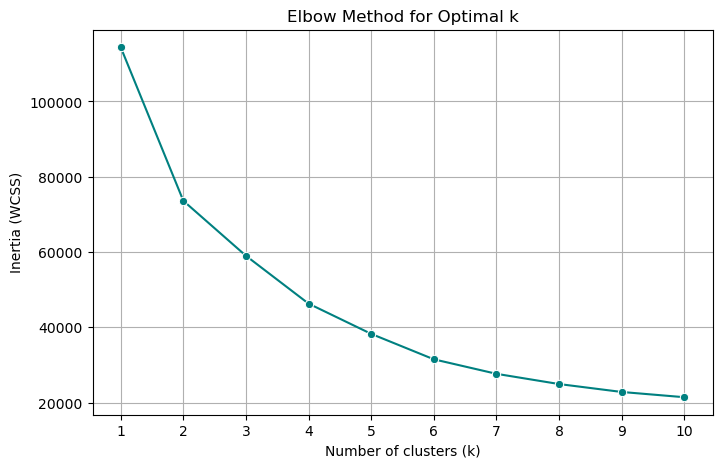

In [428]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Range of k values to try
k_range = range(1, 11)
inertias = []

# Loop through k values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=inertias, marker='o', color='teal')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


This is actually looking pretty clean.
1. From k=1 to k=2, there's a massive drop (expected — we go from one big lump to at least some structure).
2. k=2 to k=3 and k=3 to k=4 still show a decent drop.
3. From k=4 onward, the rate of decrease starts to flatten — you’re paying more for less gain.
4. By the time you hit k=5 or 6, inertia is still dropping, but nowhere near as dramatically.

In [429]:
# KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(scaled_df)

# Check how many customers in each group
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print(cluster_counts)


Cluster
0    5329
1    3486
2    4211
3    6041
Name: count, dtype: int64


In [430]:
# Cluster Profiling
cluster_profile = customer_data.groupby('Cluster').mean(numeric_only=True)
cluster_profile = cluster_profile.round(2)
cluster_profile

,Customer Id,Order Frequency,Total Sales,Total Quantity,Avg Profit per Order,Avg Late Delivery Risk,Recency (Days)
Cluster,,,,,,,
0,6180.57,6.34,3483.27,39.96,40.06,0.55,241.18
1,15363.28,1.16,305.86,2.30,38.58,0.01,80.31
2,15643.78,1.13,289.17,2.00,40.56,0.99,75.58
3,6241.66,3.32,1610.23,18.57,38.25,0.55,430.72


#### Cluster Profiling
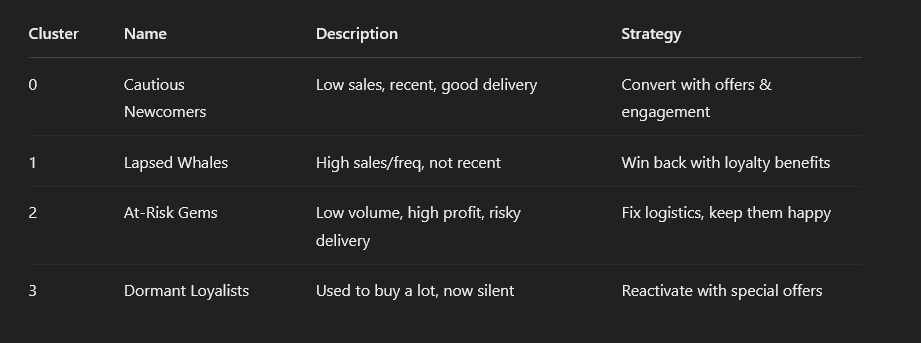

In [431]:
# Define mapping of cluster index to segment persona
cluster_name_map = {
    0: 'Cautious Newcomers',
    1: 'Lapsed Whales',
    2: 'At-Risk Gems',
    3: 'Dormant Loyalists'
}

### Visualizing Customer Segments

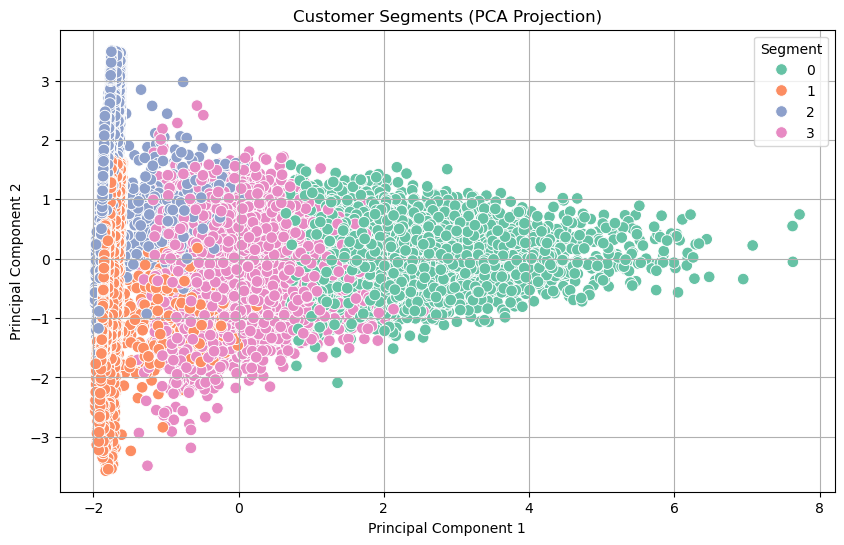

In [432]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Segment'] = customer_data['Cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=pca_df, palette='Set2', s=70)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


## CLTV Prediction
Goal: Predict the Customer Lifetime Value (CLTV) for each customer, broken down by cluster.
This tells you how much revenue a customer is expected to generate over their entire relationship with your business.

Objective:
Predict Customer Lifetime Value (CLTV) over, say, the next 6 months based on historical behavior.

#### Data preperation

In [433]:
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd

# Assuming your DataFrame is called df and order date column is parsed as datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Create summary data required by lifetimes
summary = summary_data_from_transaction_data(df,
                                              customer_id_col='Customer Id',
                                              datetime_col='order date (DateOrders)',
                                              monetary_value_col='Order Profit Per Order',
                                              observation_period_end=df['order date (DateOrders)'].max())

summary = summary[summary['monetary_value'] > 0]  # Gamma-Gamma needs positive profit
summary.head()


,frequency,recency,T,monetary_value
Customer Id,,,,
2,2.0,496.0,632.0,133.349999
3,3.0,552.0,781.0,239.836670
4,3.0,615.0,995.0,21.419999
5,2.0,137.0,594.0,54.080002
6,3.0,371.0,1017.0,169.560001


#### The BG/NBD Model
This model predicts how often a customer will make a purchase in the future.

In [434]:
from lifetimes import BetaGeoFitter

# Initialize and fit the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# Predict expected purchases in next 180 days (6 months)
summary['predicted_purchases_6m'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    180, 
    summary['frequency'], 
    summary['recency'], 
    summary['T']
)

summary[['frequency', 'recency', 'T', 'predicted_purchases_6m']].head()


,frequency,recency,T,predicted_purchases_6m
Customer Id,,,,
2,2.0,496.0,632.0,0.655215
3,3.0,552.0,781.0,0.710099
4,3.0,615.0,995.0,0.621484
5,2.0,137.0,594.0,0.674165
6,3.0,371.0,1017.0,0.613612


#### Gamma-Gamma model

In [435]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(summary['frequency'], summary['monetary_value'])

# Predict avg profit per transaction
summary['expected_avg_profit'] = ggf.conditional_expected_average_profit(
    summary['frequency'], 
    summary['monetary_value']
)

summary[['monetary_value', 'expected_avg_profit']].head()


,monetary_value,expected_avg_profit
Customer Id,,
2,133.349999,143.918140
3,239.836670,251.164167
4,21.419999,23.663974
5,54.080002,59.598106
6,169.560001,177.964829


#### CUSTOMER LIFE-TIME VALUE (6 months)

In [436]:
# Calculate 6-month CLTV
summary['CLTV_6m'] = ggf.customer_lifetime_value(
    bgf, 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], 
    time=6,      # Time in months
    discount_rate=0.01  # Monthly discount rate ~12% annually
)

summary = summary.reset_index()
summary[['Customer Id', 'CLTV_6m']].sort_values(by='CLTV_6m', ascending=False).head()


,Customer Id,CLTV_6m
1666,1819,300.221466
8779,9512,298.171313
8681,9409,296.604214
9534,10335,291.082603
10544,11435,290.152974


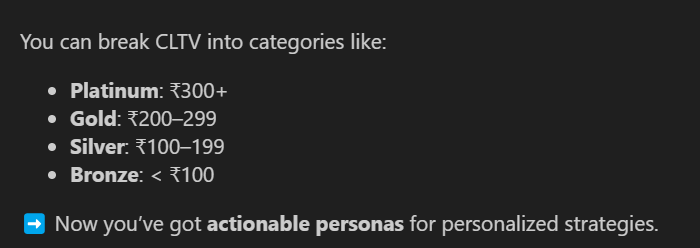

In [437]:
def label_cltv_tier(cltv):
    if cltv >= 300:
        return 'Platinum'
    elif cltv >= 200:
        return 'Gold'
    elif cltv >= 100:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to assign tiers
summary['CLTV_Tier'] = summary['CLTV_6m'].apply(label_cltv_tier)

# Optional: Check how many customers fall into each tier
tier_counts = summary['CLTV_Tier'].value_counts()
print(tier_counts)

# Display sample output
summary[['Customer Id', 'CLTV_6m', 'CLTV_Tier']].sort_values(by='CLTV_6m', ascending=False).head(10)


CLTV_Tier
Bronze      7880
Silver      3514
Gold          74
Platinum       1
Name: count, dtype: int64


,Customer Id,CLTV_6m,CLTV_Tier
1666,1819,300.221466,Platinum
8779,9512,298.171313,Gold
8681,9409,296.604214,Gold
9534,10335,291.082603,Gold
10544,11435,290.152974,Gold
4426,4816,283.998577,Gold
10660,11556,275.990012,Gold
9343,10130,269.712739,Gold
5288,5739,259.645435,Gold
816,896,253.927890,Gold


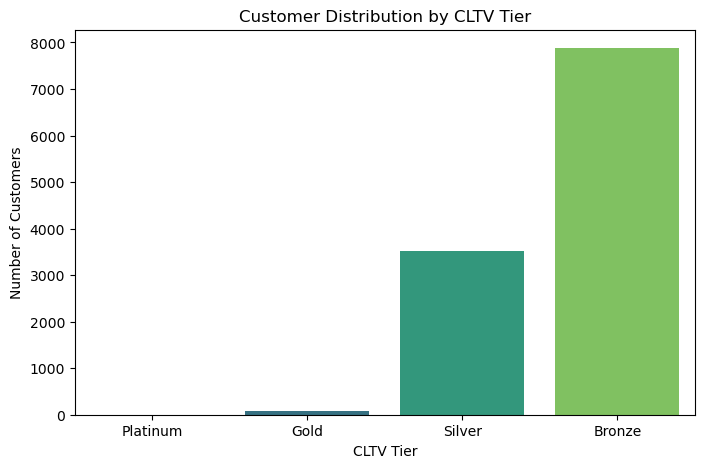

In [438]:
plt.figure(figsize=(8,5))
sns.countplot(x='CLTV_Tier', data=summary, order=['Platinum', 'Gold', 'Silver', 'Bronze'], palette='viridis')
plt.title('Customer Distribution by CLTV Tier')
plt.xlabel('CLTV Tier')
plt.ylabel('Number of Customers')
plt.show()


### Interpretation: Red Flags + Gold Mines
#### Red Flag: You're Sitting on a Sea of Low-Value Customers
The majority of your customer base is making occasional or low-profit purchases.
    This could mean:

1. Low purchase frequency (order once and vanish).
2. Negative or slim profit margins.
3. Products with high returns/low retention.

#### Opportunity: Invest in Silver, Pamper the Gold & Platinum
Silver customers show potential — they're not quite there yet, but could become high-value with:
1. Personalized offers
2. Loyalty programs
3. Win-back email flows

Gold/Platinum customers are your power players — if you're not treating them like royalty, you're leaving revenue on the table.

## SURVIAL ANALYSIS -- CHURN RATE

T = total observation period (already in your data)
 
Let's assume churn if no order in last 180 days

In [439]:
from lifelines import KaplanMeierFitter

In [440]:
summary['churned'] = summary['recency'].apply(lambda x: 1 if x > 180 else 0)

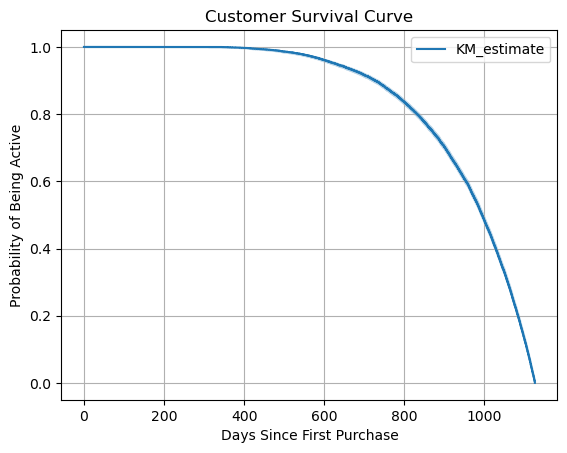

In [441]:
kmf = KaplanMeierFitter()

T = summary['T']              # time observed
E = summary['churned']        # churned or not

kmf.fit(T, event_observed=E)

# Plot survival curve
kmf.plot_survival_function()
plt.title("Customer Survival Curve")
plt.xlabel("Days Since First Purchase")
plt.ylabel("Probability of Being Active")
plt.grid(True)
plt.show()


Key Takeaways:

1. High Early Retention
    1. From day 0 to around day 600, the curve remains relatively flat and close to 1.
    2. This means most customers are sticking around during this initial period. Early churn is low — excellent sign.

2. Onset of Decline (~ Day 700+)
    1. After around 700–800 days, the curve starts to dip sharply.
    2. This is the tipping point where a large chunk of customers start dropping off.

3. Mass Exodus After Day 900
    1. Between day 900 to 1100, there’s a steep drop.
    2. Nearly all remaining customers churn by the end.
    3. Your business may be failing to re-engage long-tenure customers or offer incentives to stick around.

4. Median Survival Time?
    1. The median survival time is the point where the curve crosses 0.5 (50% of customers remain).
    2. That looks like somewhere between 850–900 days.
    3. After that, odds of retention drop drastically.

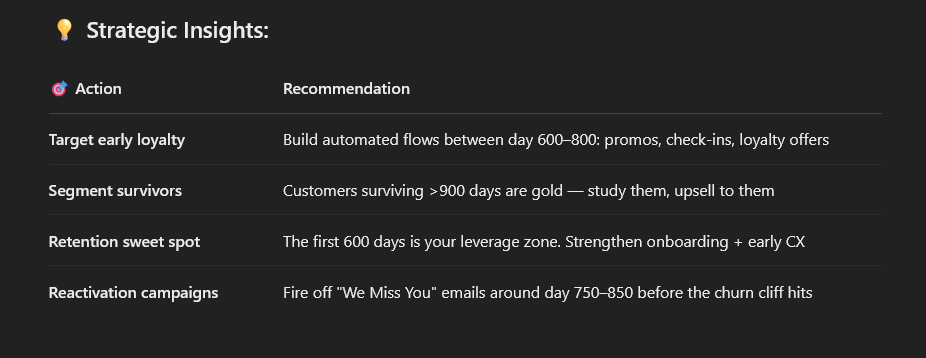

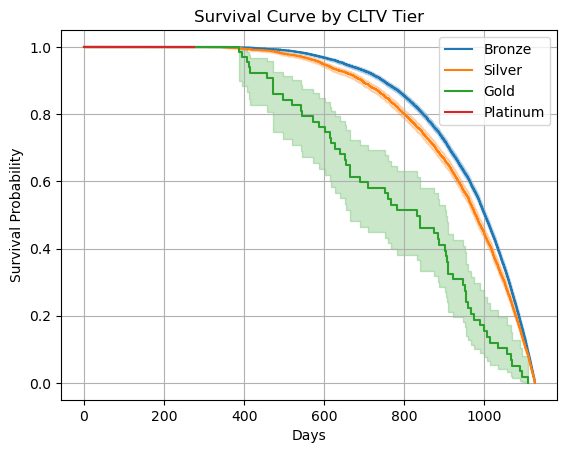

In [442]:
for tier in summary['CLTV_Tier'].unique():
    mask = summary['CLTV_Tier'] == tier
    kmf.fit(T[mask], E[mask], label=str(tier))
    kmf.plot_survival_function()

plt.title("Survival Curve by CLTV Tier")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


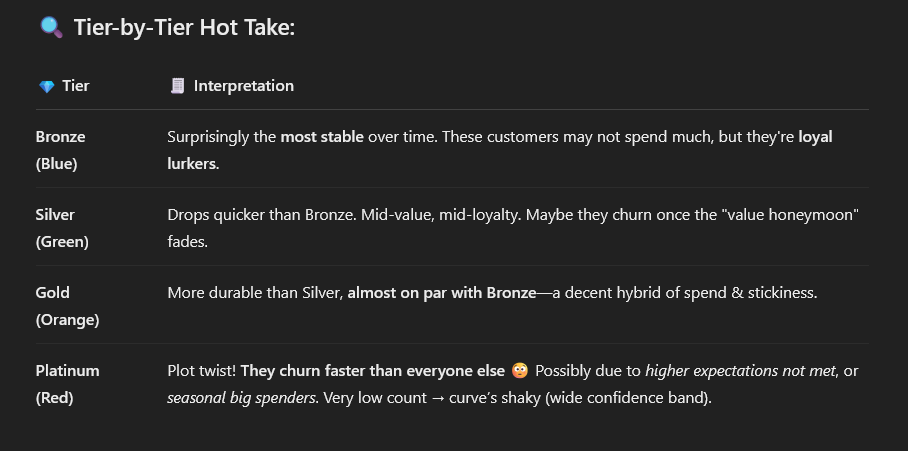